In [1]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

In [2]:
titanic_data = pd.read_csv('train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [5]:
X = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [6]:
X['Age'] = X['Age'].fillna(X.Age.median())

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [8]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.558399385618932, 0.9772727272727273, 'X[5] <= 0.5\ngini = 0.467\nsamples = 596\nvalue = [374, 222]'),
 Text(0.29519682949029125, 0.9318181818181818, 'X[1] <= 3.5\ngini = 0.304\nsamples = 390\nvalue = [317, 73]'),
 Text(0.15734981796116504, 0.8863636363636364, 'X[2] <= 3.0\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.14764108009708737, 0.8409090909090909, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.1670585558252427, 0.8409090909090909, 'X[1] <= 2.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.15734981796116504, 0.7954545454545454, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.1767672936893204, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.43304384101941745, 0.8863636363636364, 'X[4] <= 52.277\ngini = 0.278\nsamples = 377\nvalue = [314, 63]'),
 Text(0.2058935072815534, 0.8409090909090909, 'X[1] <= 77.0\ngini = 0.239\nsamples = 332\nvalue = [286, 46]'),
 Text(0.19618476941747573, 0.7954545454545454, 'X[0] <= 1.5\ngini = 0

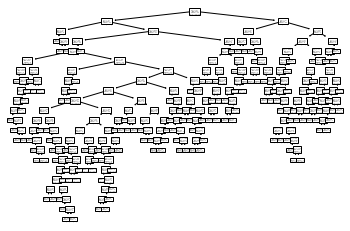

In [48]:
tree.plot_tree(clf)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [11]:
clf.score(X, y)

0.9797979797979798

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [13]:
clf.score(X_test, y_test)

0.7559322033898305

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
clf.score(X_test, y_test)

0.8203389830508474

# Try getting as better values as possible

In [17]:
scores_data = pd.DataFrame()
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_scores_data = pd.DataFrame({'max_depth': [max_depth], 
                                     'score_train': [score_train], 
                                     'score_test': [score_test],
                                     'cross_val_score': [mean_cross_val_score]
                                    })
    scores_data = pd.concat([scores_data, temp_scores_data], ignore_index=True)

In [18]:
scores_data_long = pd.melt(scores_data, 
                           id_vars = ['max_depth'], 
                           value_vars = ['score_train','score_test', 'cross_val_score'], 
                           var_name = 'set_type', 
                           value_name = 'score')

In [19]:
scores_data_long[scores_data_long.set_type=='cross_val_score'].sort_values(by='score', ascending=False)

,max_depth,set_type,score
209,12,cross_val_score,0.805420
210,13,cross_val_score,0.805392
208,11,cross_val_score,0.803711
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.802059
...,...,...,...
241,44,cross_val_score,0.760112
228,31,cross_val_score,0.760112
267,70,cross_val_score,0.760098
242,45,cross_val_score,0.760098


<AxesSubplot:xlabel='max_depth', ylabel='score'>

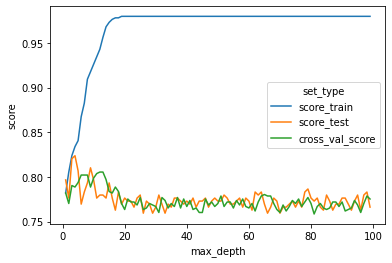

In [20]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [21]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [22]:
cross_val_score(clf, X_test, y_test, cv=6).mean()

0.7725850340136055

#  GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV 

In [24]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [25]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth': range(1,10)}

In [26]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [27]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)})

In [28]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [29]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [30]:
best_clf.score(X_test, y_test)

0.7694915254237288

# Metrics

In [31]:
from sklearn.metrics import precision_score, recall_score

In [32]:
y_pred = best_clf.predict(X_test)

In [33]:
precision_score(y_test, y_pred)

0.8023255813953488

In [34]:
recall_score(y_test, y_pred)

0.575

# predict_proba

In [35]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ],
       [1.        , 0.        ],
       [0.23809524, 0.76190476],
       [0.88518519, 0.11481481],
       [0.23809524, 0.76190476],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.60714286, 0.39285714],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.60714286, 0.39285714],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.65625   , 0.34375   ],
       [0.

<AxesSubplot:>

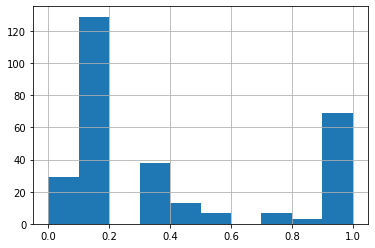

In [36]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [37]:
y_pred = np.where(y_predicted_prob[:, 1]>.8,1,0)

In [38]:
precision_score(y_test, y_pred)

0.8611111111111112

In [39]:
recall_score(y_test, y_pred)

0.5166666666666667

In [40]:
y_pred = np.where(y_predicted_prob[:, 1]>.2,1,0)

In [41]:
precision_score(y_test, y_pred)

0.7372262773722628

In [42]:
recall_score(y_test, y_pred)

0.8416666666666667

# roc_curve

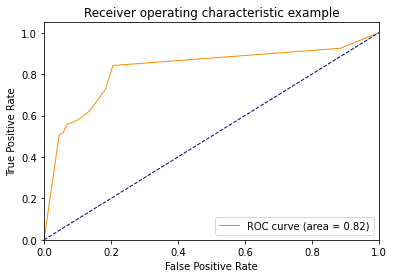

In [43]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [64]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [65]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

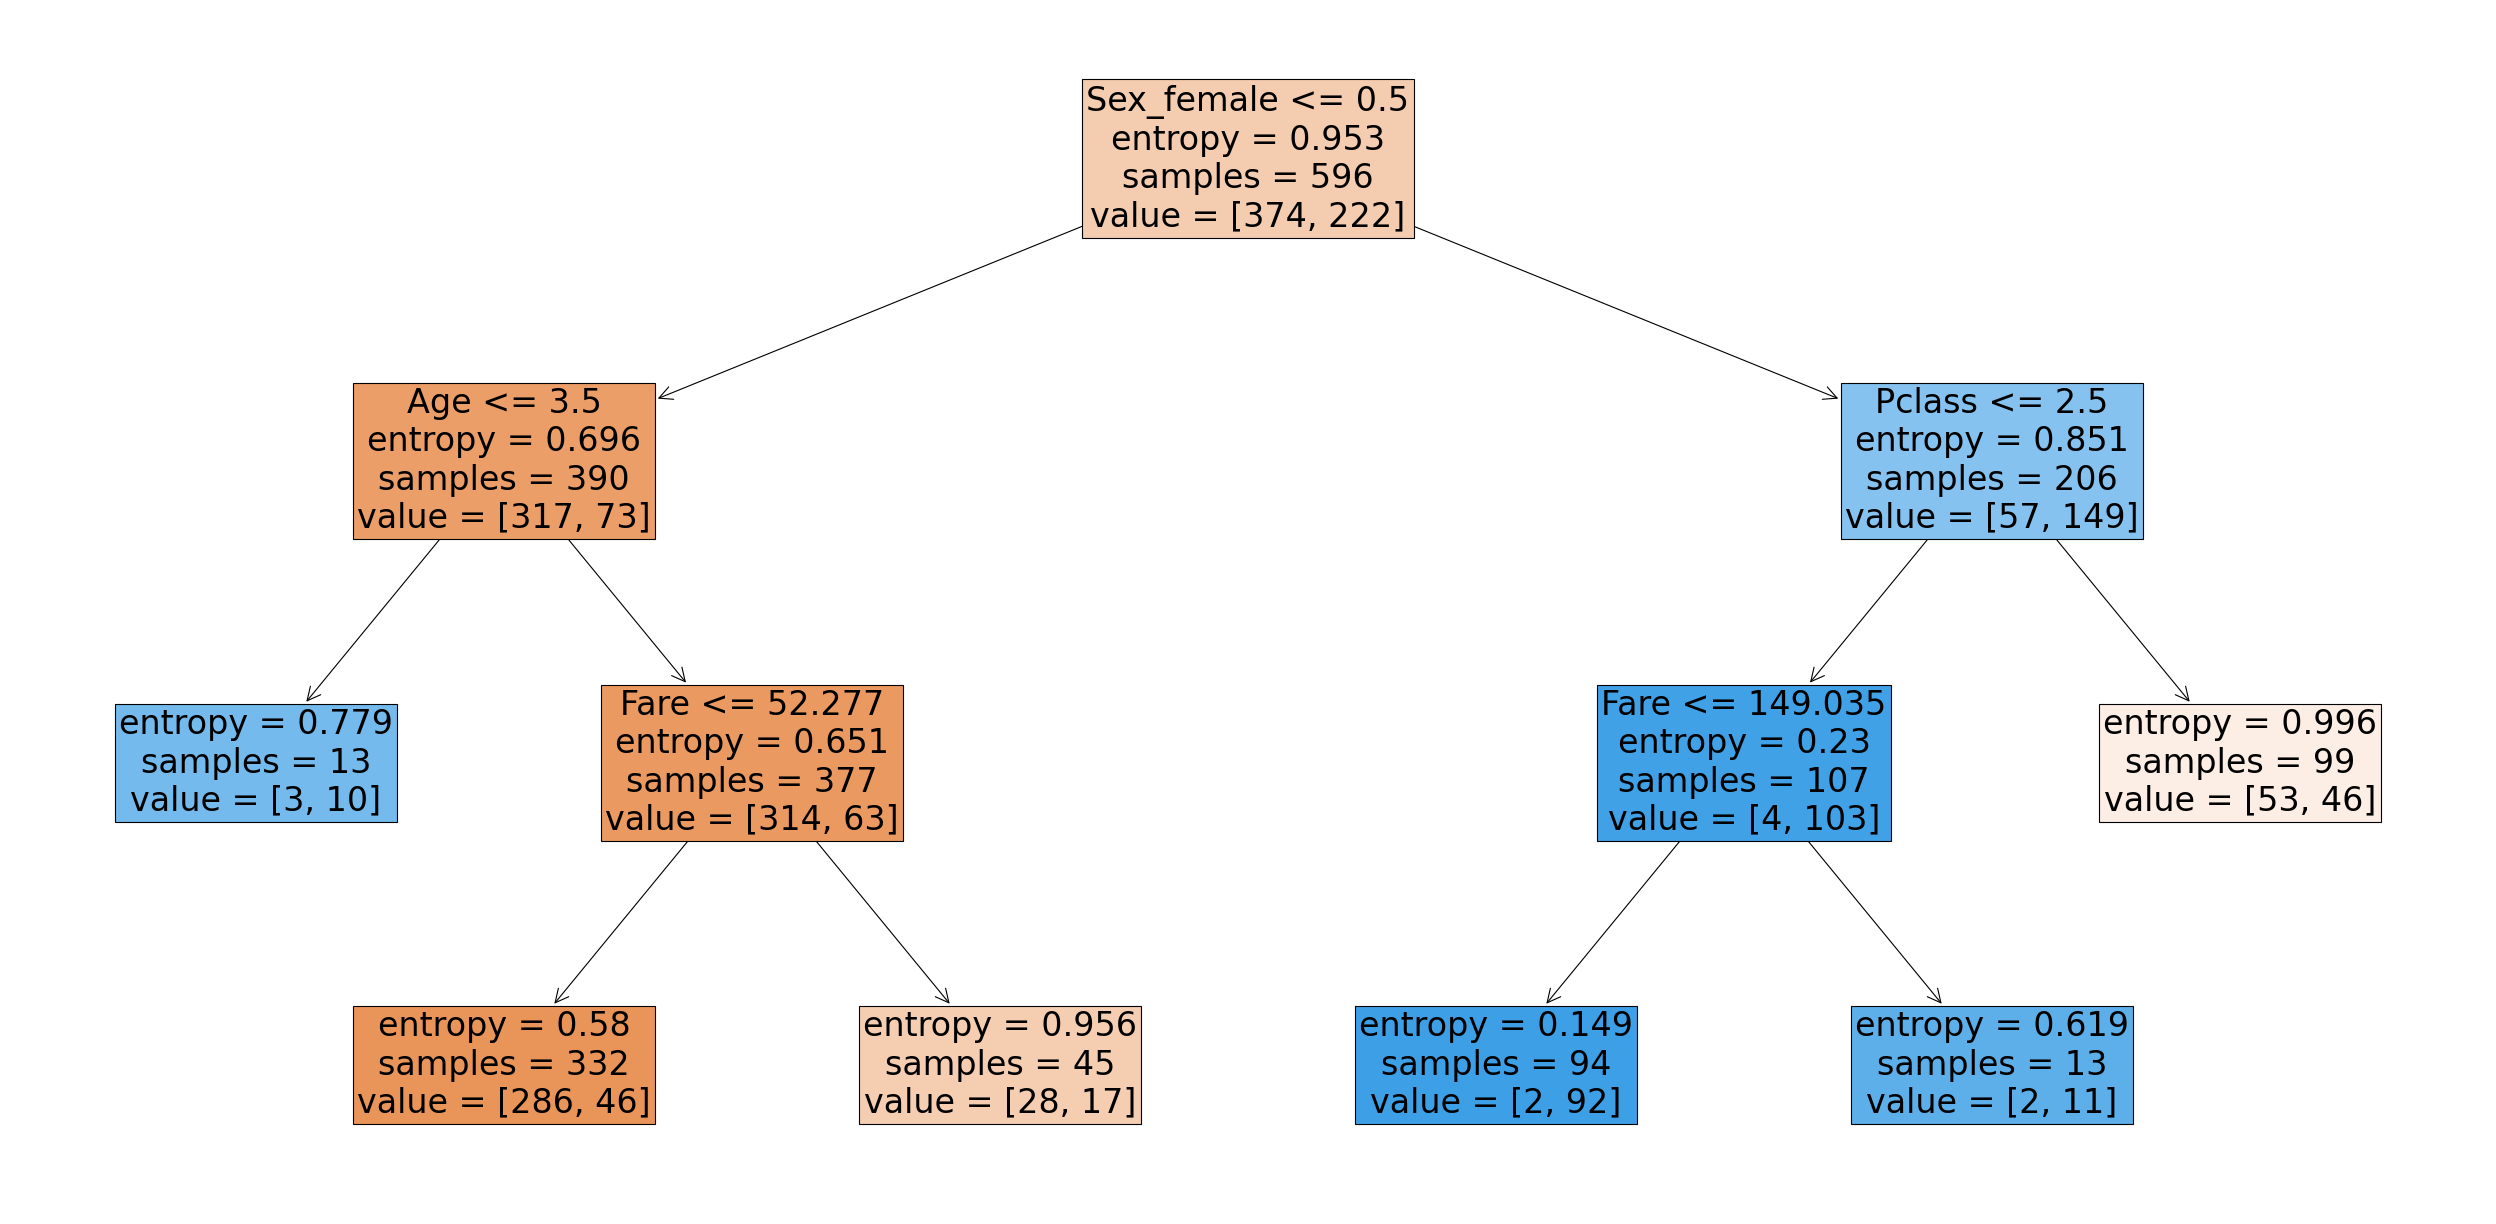

In [66]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=30,filled=True,feature_names=list(X))